In [1]:
import numpy as np
import matplotlib.pyplot as plt

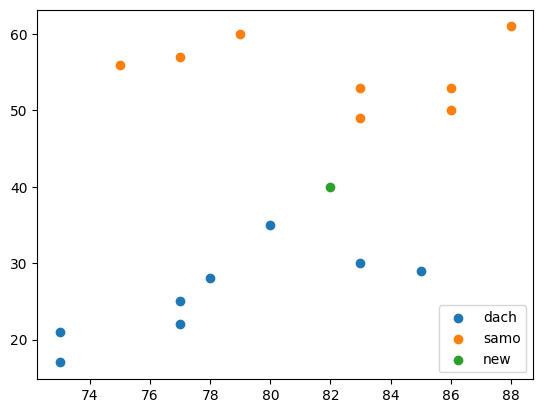

In [2]:
dach_l = [77,78,85,83,73,77,73,80]
dach_h = [25,28,29,30,21,22,17,35]
samo_l = [75,77,86,86,79,83,83,88]
samo_h = [56,57,50,53,60,53,49,61]

new_l = [82]
new_h = [40]

plt.figure()
plt.scatter(dach_l, dach_h, label='dach')
plt.scatter(samo_l, samo_h, label='samo')

plt.scatter(new_l, new_h, label='new')

plt.legend()
plt.show()

In [3]:
X_dach = np.column_stack([dach_l, dach_h])
y_dach = np.zeros(len(X_dach)) # np.zeros(x_dach.shape[0])

X_samo = np.column_stack([samo_l, samo_h])
y_samo = np.ones(len(X_dach))

X_train = np.concatenate([X_dach, X_samo])  # axis=0
y_train = np.concatenate([y_dach, y_samo])

X_test = np.array([[84, 42]])

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors가 k값
knn.fit(X_train, y_train)

knn.predict(X_test)

array([1.])

In [5]:
target = np.array([0] * 15 + [1] * 5)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [8]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print(confusion_matrix(target, pred))
print(recall_score(target, pred))
print(precision_score(target, pred))
print(f1_score(target, pred))
print(accuracy_score(target, pred))

[[7 8]
 [2 3]]
0.6
0.2727272727272727
0.37499999999999994
0.5


# 오후

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X = iris.data
y = iris.target

In [17]:
mask = y != 0
X = X[mask]
y = y[mask]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
y = y - 1

In [21]:
X = X[:, [0,2]]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
lr = LogisticRegression(solver='liblinear', C=0.0001, random_state=1)
lr.fit(X_train, y_train)


LogisticRegression(C=0.0001, random_state=1, solver='liblinear')

In [45]:
prob = lr.predict_proba(X_test) # 예측확률

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y_test, prob[:,1])

In [47]:
roc_auc_score(y_test, prob[:,1])

0.9733333333333333

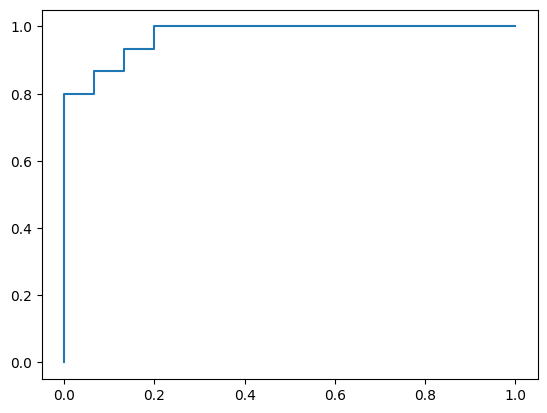

In [48]:
plt.figure()
plt.plot(fpr, tpr)
plt.show()

# 배깅

In [52]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [54]:
mask = y != 2
X = X[mask]
y = y[mask]

In [57]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


lr = LogisticRegression(solver='liblinear', C=1, random_state=1)
bag = BaggingClassifier(base_estimator=lr, n_estimators=500, n_jobs=-1) # CPU 코어 수를 지정 -1은 알아서

bag.fit(X_train, y_train)
p_test = bag.predict(X_test)

c:\Users\PC\Bcode\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [61]:
print(f1_score(y_test, p_test))

lr.fit(X_train, y_train)
print(f1_score(y_test, lr.predict(X_test)))


0.975609756097561
0.9523809523809523


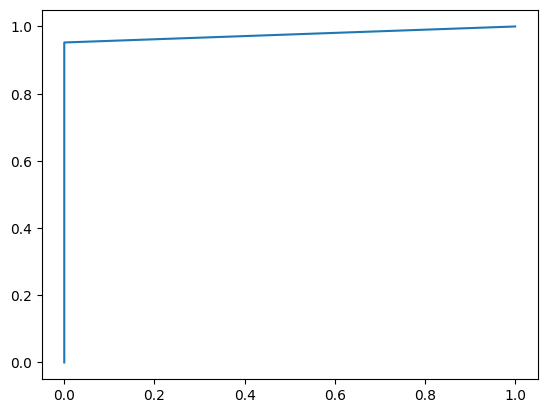

In [63]:
fpr, tpr, thres = roc_curve(y_test, p_test)
roc_auc_score(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

# AdaBoost

### 개개별의 모델이 과소적합이 잘 되기 때문에, 
### 데이터 수가 적다면 오히려 성능이 떨어짐

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=lr, n_estimators=500, learning_rate=0.1)

ada.fit(X_train, y_train)
p_test = ada.predict(X_test)
f1_score(y_test, p_test)

c:\Users\PC\Bcode\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9

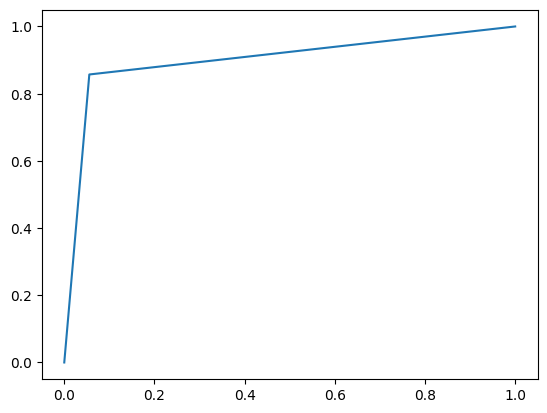

In [65]:
fpr, tpr, thres = roc_curve(y_test, p_test)
roc_auc_score(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

In [77]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data
y = iris.target

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [78]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=('iris_tree.dot'), feature_names=iris.feature_names)

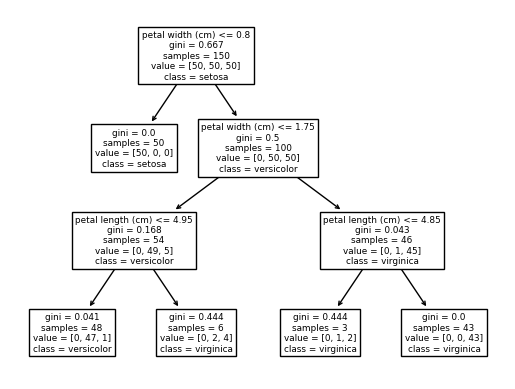

In [79]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()